# Importing essential libraries for Data Analysis
1. pandas
2. seaborn

In [2]:
%pylab inline
import pandas
import seaborn

Populating the interactive namespace from numpy and matplotlib


# Cleansing Data and making it efficient for analysis

In [3]:
data = pandas.read_csv('./Data/uber-raw-data-apr14.csv')  #loading Data from csv to Data Frame.

In [4]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


In [5]:
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)

In [6]:
data.tail() #checking whether the timestamp is successfully applied.

,Date/Time,Lat,Lon,Base
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764


In [11]:
def get_dom(dt):
    return dt.day

data['dom'] = data['Date/Time'].map(get_dom)

In [7]:
def get_weekday(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)


In [8]:
def get_hour(dt):
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)


In [ ]:
##Added two columns viz. what_day_of_week and what_hour_of_the_day for easy segregation

In [9]:
data.head()

,Date/Time,Lat,Lon,Base,weekday,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,0


# Analysing Rides taken; by the day of Month

Text(0.5, 1.0, 'Frequency by Date of Month')

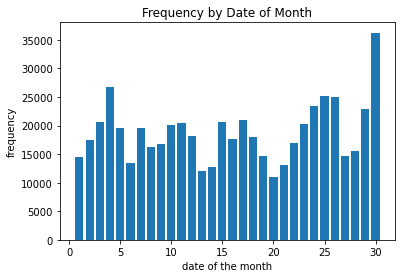

In [22]:
hist(data.dom, bins=30, rwidth=.8, range=(0.5, 30.5))
xlabel('date of the month')
ylabel('frequency')
title('Frequency by Date of Month')

In [14]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)
by_date
#Illustrating the Graph

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

<BarContainer object of 30 artists>

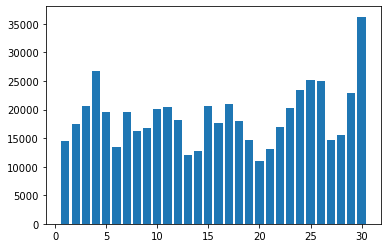

In [15]:
bar(range(1, 31), by_date)

#Sorting frequency lower to higher and plotting it

In [16]:
sort_by_date = by_date.sort_values()
sort_by_date

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

#This shows Frequency of Data in ascending order

Text(0.5, 1.0, 'Frequency by Day of month')

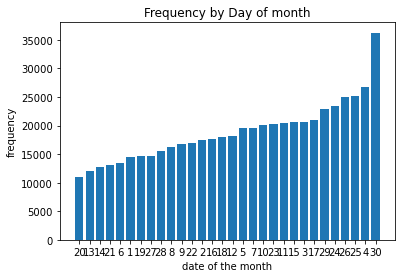

In [21]:
bar(range(1, 31), sort_by_date)
xticks(range(1,31), sort_by_date.index)
xlabel('date of the month')
ylabel('frequency')
title('Frequency by Day of month')

#Hourly Data Plotting

(array([ 7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924., 22843.,
        17939., 17865., 18774., 19425., 22603., 27190., 35324., 42003.,
        45475., 43003., 38923., 36244., 36964., 30645., 20649.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <a list of 24 Patch objects>)

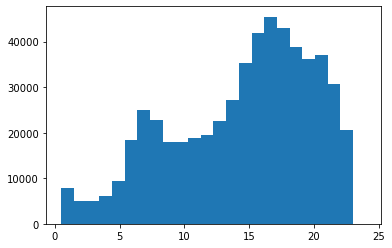

In [23]:
hist(data.hour, bins=24, range=(.5, 24))